In [2]:
import json
from pathlib import Path
from collections import defaultdict, OrderedDict

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.utils import draw_bounding_boxes
from torchvision.ops import box_convert

In [3]:
tao_frames_root_path = Path('/home/tri110414/nfs_home/datasets/TAO/frames')
with open('annotations/train.json') as f:
    data = json.load(f)

In [4]:
data.keys()

dict_keys(['videos', 'annotations', 'tracks', 'images', 'info', 'categories', 'licenses'])

In [5]:
data["images"]

[{'id': 0,
  'video': 'train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e',
  '_scale_task_id': '5de800eddb2c18001a56aa11',
  'width': 640,
  'height': 480,
  'file_name': 'train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e/frame0391.jpg',
  'frame_index': 390,
  'license': 0,
  'video_id': 0},
 {'id': 1,
  'video': 'train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e',
  '_scale_task_id': '5de800eddb2c18001a56aa11',
  'width': 640,
  'height': 480,
  'file_name': 'train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e/frame0421.jpg',
  'frame_index': 420,
  'license': 0,
  'video_id': 0},
 {'id': 2,
  'video': 'train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e',
  '_scale_task_id': '5de800eddb2c18001a56aa11',
  'width': 640,
  'height': 480,
  'file_name': 'train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e/frame0451.jpg',
  'frame_index': 450,
  'license': 0,
  'video_id': 0},
 {'id': 3,
  'video': 'train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e',
  '_scale_task_id': '5de800eddb2c18001a56aa

In [6]:
for cat in data['categories']:
    if cat['frequency'] == 'r':
        print(cat['name'], cat['instance_count'])

acorn 0
alligator 0
amplifier 0
apple_juice 0
applesauce 0
apricot 0
armoire 0
armor 1
ax 4
bagpipe 0
baguet 0
bait 0
ballet_skirt 0
Band_Aid 0
banjo 0
barbell 0
barge 0
bass_horn 0
bat_(animal) 0
batter_(food) 2
beachball 0
beaker 0
beeper 0
beetle 0
Bible 1
birdfeeder 5
birdbath 0
birthday_card 0
biscuit_(bread) 0
pirate_flag 0
blimp 0
boar 0
gameboard 2
bobby_pin 0
bolo_tie 0
bonnet 0
book_bag 9
bookmark 0
boom_microphone 1
bow_(weapon) 2
pipe_bowl 0
bowling_ball 7
bowling_pin 0
boxing_glove 0
brass_plaque 0
breechcloth 0
broach 1
bubble_gum 0
horse_buggy 4
bulldog 0
bulldozer 0
bulletproof_vest 0
corned_beef 0
burrito 2
cabana 0
cabin_car 3
locker 0
candelabrum 0
candy_bar 0
cannon 0
cantaloup 4
canteen 0
cape 1
elevator_car 0
car_battery 0
cardigan 0
cargo_ship 1
carnation 0
casserole 0
cassette 0
caviar 0
chain_mail 0
chaise_longue 0
champagne 0
chap 1
checkbook 0
checkerboard 1
chessboard 2
chest_of_drawers_(furniture) 1
chickpea 0
Chihuahua 0
chili_(vegetable) 0
chime 0
chinawa

In [7]:
data['categories'][804]

{'frequency': 'f',
 'id': 805,
 'synset': 'person.n.01',
 'image_count': 93,
 'instance_count': 487,
 'synonyms': ['baby',
  'child',
  'boy',
  'girl',
  'man',
  'woman',
  'person',
  'human'],
 'def': 'a human being',
 'name': 'baby'}

In [7]:
data['annotations'][1]

{'segmentation': [[156, 97, 306, 97, 306, 398, 156, 398]],
 'bbox': [156, 97, 150, 301],
 'area': 45150,
 'iscrowd': 0,
 'id': 1,
 'image_id': 0,
 'category_id': 805,
 'track_id': 1,
 '_scale_uuid': '82addabd-8991-49f8-b63e-e0e767d4e695',
 'scale_category': 'moving object',
 'video_id': 0}

In [8]:
data['annotations'][6]

{'segmentation': [[58, 63, 465, 63, 465, 480, 58, 480]],
 'bbox': [58, 63, 407, 417],
 'area': 169719,
 'iscrowd': 0,
 'id': 6,
 'image_id': 1,
 'category_id': 805,
 'track_id': 1,
 '_scale_uuid': '82addabd-8991-49f8-b63e-e0e767d4e695',
 'scale_category': 'moving object',
 'video_id': 0}

In [9]:
data['images'][0]

{'id': 0,
 'video': 'train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e',
 '_scale_task_id': '5de800eddb2c18001a56aa11',
 'width': 640,
 'height': 480,
 'file_name': 'train/YFCC100M/v_f69ebe5b731d3e87c1a3992ee39c3b7e/frame0391.jpg',
 'frame_index': 390,
 'license': 0,
 'video_id': 0}

In [10]:
data['categories'][804]

{'frequency': 'f',
 'id': 805,
 'synset': 'person.n.01',
 'image_count': 93,
 'instance_count': 487,
 'synonyms': ['baby',
  'child',
  'boy',
  'girl',
  'man',
  'woman',
  'person',
  'human'],
 'def': 'a human being',
 'name': 'baby'}

In [22]:
for i, d in enumerate(data["categories"]):
    searched_class = 'card'
    if (d["name"] == searched_class) or (searched_class in d["synonyms"]) or (searched_class in d["synset"]):
        print(d["name"],'id:', d["id"], 'index:', i)
        print(d)

birthday_card id: 105 index: 104
{'frequency': 'r', 'id': 105, 'synset': 'birthday_card.n.01', 'image_count': 0, 'instance_count': 0, 'synonyms': ['birthday_card'], 'def': 'a card expressing a birthday greeting', 'name': 'birthday_card'}
business_card id: 175 index: 174
{'frequency': 'c', 'id': 175, 'synset': 'business_card.n.01', 'image_count': 0, 'instance_count': 0, 'synonyms': ['business_card'], 'def': "a card on which are printed the person's name and business affiliation", 'name': 'business_card'}
identity_card id: 215 index: 214
{'frequency': 'c', 'id': 215, 'synset': 'card.n.02', 'image_count': 2, 'instance_count': 2, 'synonyms': ['identity_card'], 'def': 'a card certifying the identity of the bearer', 'name': 'identity_card'}
card id: 216 index: 215
{'frequency': 'c', 'id': 216, 'synset': 'card.n.03', 'image_count': 4, 'instance_count': 13, 'synonyms': ['card'], 'def': 'a rectangular piece of paper used to send messages (e.g. greetings or pictures)', 'name': 'card'}
cardigan i

## Plot frames of video

In [ ]:
init_i = 0
for i in range(20):
    i = init_i + i
    im = Image.open(tao_frames_root_path / data['images'][i]['file_name'])
    boxes = torch.tensor([a['bbox'] for a in data['annotations'] if a['image_id'] == data['images'][i]['id']])
    boxes = box_convert(boxes, in_fmt='xywh', out_fmt='xyxy')
    labels = [(a['category_id'], a['track_id']) for a in data['annotations'] if a['image_id'] == data['images'][i]['id']]
    labels = [data['categories'][n-1]['name'] + f' ID:{tr_id}' for n, tr_id in labels]
    im = draw_bounding_boxes(torch.tensor(np.array(im).transpose(2, 0, 1)), boxes, labels)
    plt.figure(figsize=(10, 10))
    plt.imshow(im.permute(1, 2, 0))
    plt.show()

## Stadistics

In [87]:
tao_frames_root_path = Path('/home/tri110414/nfs_home/datasets/TAO/frames')

split = 'train'

with open(f'annotations/{split}.json') as f:
    data = json.load(f)

In [8]:
# We are going to have a dictionary where the keys is going to be a tuple with the category_id and the track_id
# In each frame, we are going to add 1 to the count of the pair (category_id, track_id) if it is present in the frame
# If the pair is not present in the frame, we are going to add the count to the final dictionary and remove the pair from the dictionary

objects_prevalence = defaultdict(int)  # Keys = (category_id, track_id), Values = count

# In the final counts dict, the lenght of the list of each category will be the number of occurences of that category 
#   and the values will be the prevalence of that category in the videos
final_counts_dict = OrderedDict(defaultdict(list))
for i, cat in enumerate(data['categories']):
    final_counts_dict[(cat['id'], cat['name'])] = []

current_video_id = data['annotations'][0]['video_id']
current_image_id = data['annotations'][0]['image_id']
current_image_objects = []  # List of tuples (category_id, track_id)
for ann in data['annotations']:

    # Check if the video_id has changed
    if current_video_id != ann['video_id']:
        print(f'Video ID: {current_video_id} -> {ann["video_id"]}')
        # If the video_id has changed, we have to add the current_frame_dict info to the final_counts_dict
        for k, v in objects_prevalence.items():
            cat_id = k[0]
            cat_name = data['categories'][cat_id-1]['name']
            final_counts_dict[(k[0], cat_name)].append(v)

        # Restart the objects_prevalence dict
        objects_prevalence = defaultdict(int)

        current_video_id = ann['video_id']

    # Check if the image_id has changed
    if current_image_id != ann['image_id']:
        # If has changed, we have to check which objects have been mantained and which have disappeared
        # 1. Check which objects have disappeared
        #print(f'Image ID: {current_image_id} -> {ann["image_id"]}')
        list_of_present_objects = list(objects_prevalence.keys())
        for obj in list_of_present_objects:
            # If an object has disappeared, we have to add the prevalence it has had in the video to the final_counts_dict
            if obj not in current_image_objects:
                cat_id_of_obj = obj[0]
                cat_name = data['categories'][cat_id_of_obj-1]['name']
                final_counts_dict[(cat_id_of_obj, cat_name)].append(objects_prevalence.pop(obj))
                
        # 2. Check which objects have appeared
        for obj in current_image_objects:
            # If an object has appeared, we have to add it to the objects_prevalence dict
            # If the object is already present, 1 is going to be added to the count
            # If the object is not present, it is going to be added to the dict with a count of 1
            if obj not in objects_prevalence:
                objects_prevalence[(cat_id, track_id)] += 1
        
        # Restart the current_image_objects list
        current_image_objects = []
        current_image_id = ann['image_id']
    
    # If nor the video_id or the image_id have changed, we have to update the current_image_objects list with the annotation info
    cat_id = ann['category_id']
    track_id = ann['track_id']
    current_image_objects.append((cat_id, track_id))

Video ID: 0 -> 1
Video ID: 1 -> 3
Video ID: 3 -> 7
Video ID: 7 -> 9
Video ID: 9 -> 11
Video ID: 11 -> 13
Video ID: 13 -> 16
Video ID: 16 -> 38
Video ID: 38 -> 40
Video ID: 40 -> 47
Video ID: 47 -> 50
Video ID: 50 -> 51
Video ID: 51 -> 67
Video ID: 67 -> 69
Video ID: 69 -> 71
Video ID: 71 -> 72
Video ID: 72 -> 79
Video ID: 79 -> 85
Video ID: 85 -> 92
Video ID: 92 -> 109
Video ID: 109 -> 114
Video ID: 114 -> 117
Video ID: 117 -> 119
Video ID: 119 -> 121
Video ID: 121 -> 134
Video ID: 134 -> 144
Video ID: 144 -> 146
Video ID: 146 -> 152
Video ID: 152 -> 157
Video ID: 157 -> 158
Video ID: 158 -> 160
Video ID: 160 -> 170
Video ID: 170 -> 183
Video ID: 183 -> 184
Video ID: 184 -> 189
Video ID: 189 -> 201
Video ID: 201 -> 203
Video ID: 203 -> 208
Video ID: 208 -> 212
Video ID: 212 -> 214
Video ID: 214 -> 220
Video ID: 220 -> 221
Video ID: 221 -> 237
Video ID: 237 -> 239
Video ID: 239 -> 245
Video ID: 245 -> 261
Video ID: 261 -> 274
Video ID: 274 -> 275
Video ID: 275 -> 279
Video ID: 279 -> 28

### Number of appea

### Total frames count and nº of appearances

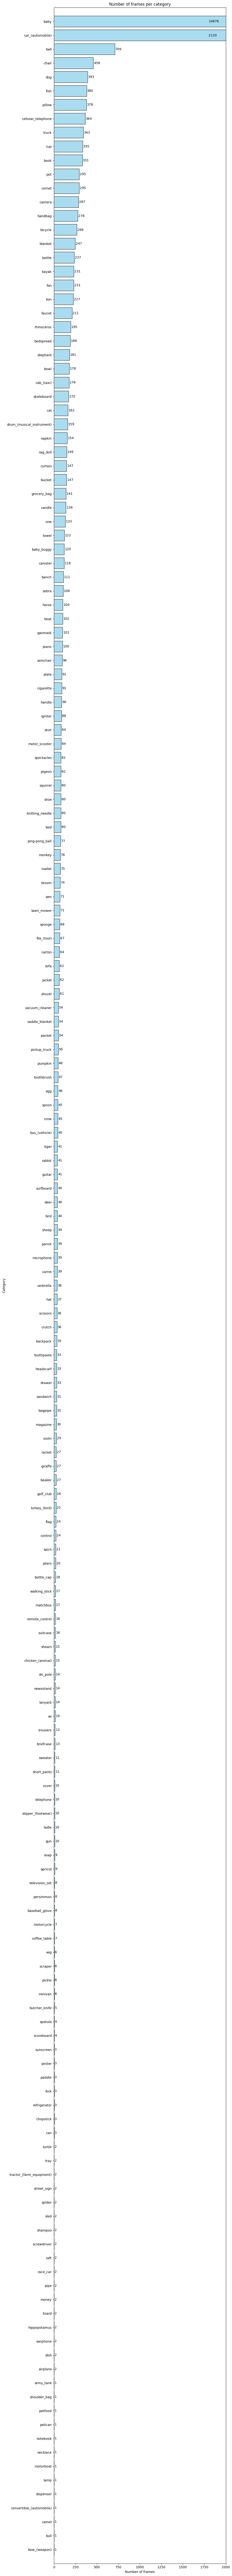

In [54]:
total_frames_per_category = OrderedDict()
for k,v in final_counts_dict.items():
    if len(v) > 0:
        total_frames_per_category[k[1]] = sum(v)

# Order the dictionary by the number of frames
total_frames_per_category = OrderedDict(sorted(total_frames_per_category.items(), key=lambda x: x[1], reverse=False))

plt.subplots(figsize=(10, len(total_frames_per_category) * 0.6))  # Adjusting figure height based on number of categories
bars = plt.barh(range(len(total_frames_per_category)), total_frames_per_category.values(),
                color='skyblue', edgecolor='black', linewidth=1.2, alpha=0.7)

x_lim = 2000
plt.yticks(range(len(total_frames_per_category)), total_frames_per_category.keys())
plt.xlim(0, x_lim)

# Adjusting the vertical limits to reduce space at the top and bottom
plt.ylim(-1, len(total_frames_per_category))

for bar, value in zip(bars, total_frames_per_category.values()):
    if bar.get_width() > x_lim:
        plt.text(x_lim - 200, bar.get_y() + bar.get_height()/2, str(value), va='center')
    else:
        plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, str(value), va='center')
# Title and labels
plt.title('Number of frames per category')
plt.xlabel('Number of frames')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig('number_of_frames_per_category.pdf', bbox_inches='tight')
plt.show()

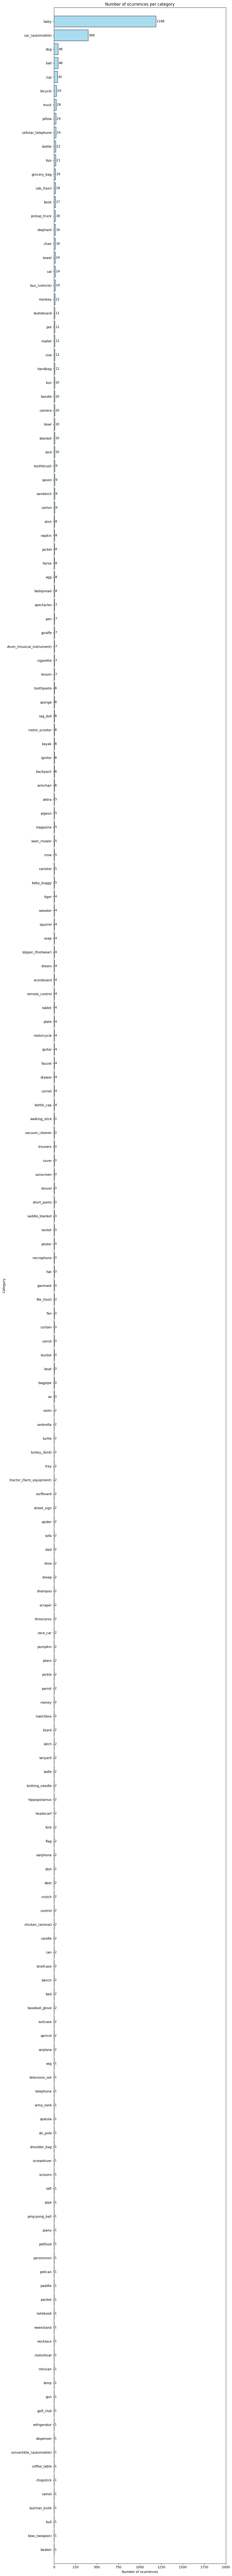

In [57]:
c = 0
total_ocurrences_per_category = OrderedDict()
for k,v in final_counts_dict.items():
    if len(v) > 0:
        total_ocurrences_per_category[k[1]] = len(v) 

### VERTICAL BAR PLOT ###
# y_lim = 2000
# plt.subplots(figsize=(50, 10))
# plt.bar(total_frames_per_category.keys(), total_frames_per_category.values())
# # Plot values above the bars at 90 degrees
# for i, v in enumerate(total_frames_per_category.values()):
#     if v > y_lim:
#         plt.text(i, y_lim - 200, str(v), ha='center', va='bottom', rotation=90)
#     else:
#         plt.text(i, v + 25, str(v), ha='center', va='bottom', rotation=90)
# plt.ylim(0, y_lim)
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.savefig('number_of_frames_per_category.pdf')
# plt.show()
        
# Order the dictionary by the number of ocurrences
total_ocurrences_per_category = OrderedDict(sorted(total_ocurrences_per_category.items(), key=lambda x: x[1], reverse=False))    

plt.subplots(figsize=(10, len(total_ocurrences_per_category) * 0.6))  # Adjusting figure height based on number of categories
bars = plt.barh(range(len(total_ocurrences_per_category)), total_ocurrences_per_category.values(),
                color='skyblue', edgecolor='black', linewidth=1.2, alpha=0.7)

x_lim = 2000
plt.yticks(range(len(total_ocurrences_per_category)), total_ocurrences_per_category.keys())
plt.xlim(0, x_lim)

# Adjusting the vertical limits to reduce space at the top and bottom
plt.ylim(-1, len(total_ocurrences_per_category))

for bar, value in zip(bars, total_ocurrences_per_category.values()):
    if bar.get_width() > x_lim:
        plt.text(x_lim - 200, bar.get_y() + bar.get_height()/2, str(value), va='center')
    else:
        plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2, str(value), va='center')

# Title and labels
plt.title('Number of ocurrences per category')
plt.xlabel('Number of ocurrences')
plt.ylabel('Category')        
plt.tight_layout()
plt.savefig('number_of_ocurrences_per_category.pdf', bbox_inches='tight')
plt.show()

### Prevalence vs Ocurrence

In [ ]:
for k in final_counts_dict.keys():
    if 'car' in k[1]:
        print(k, final_counts_dict[k])

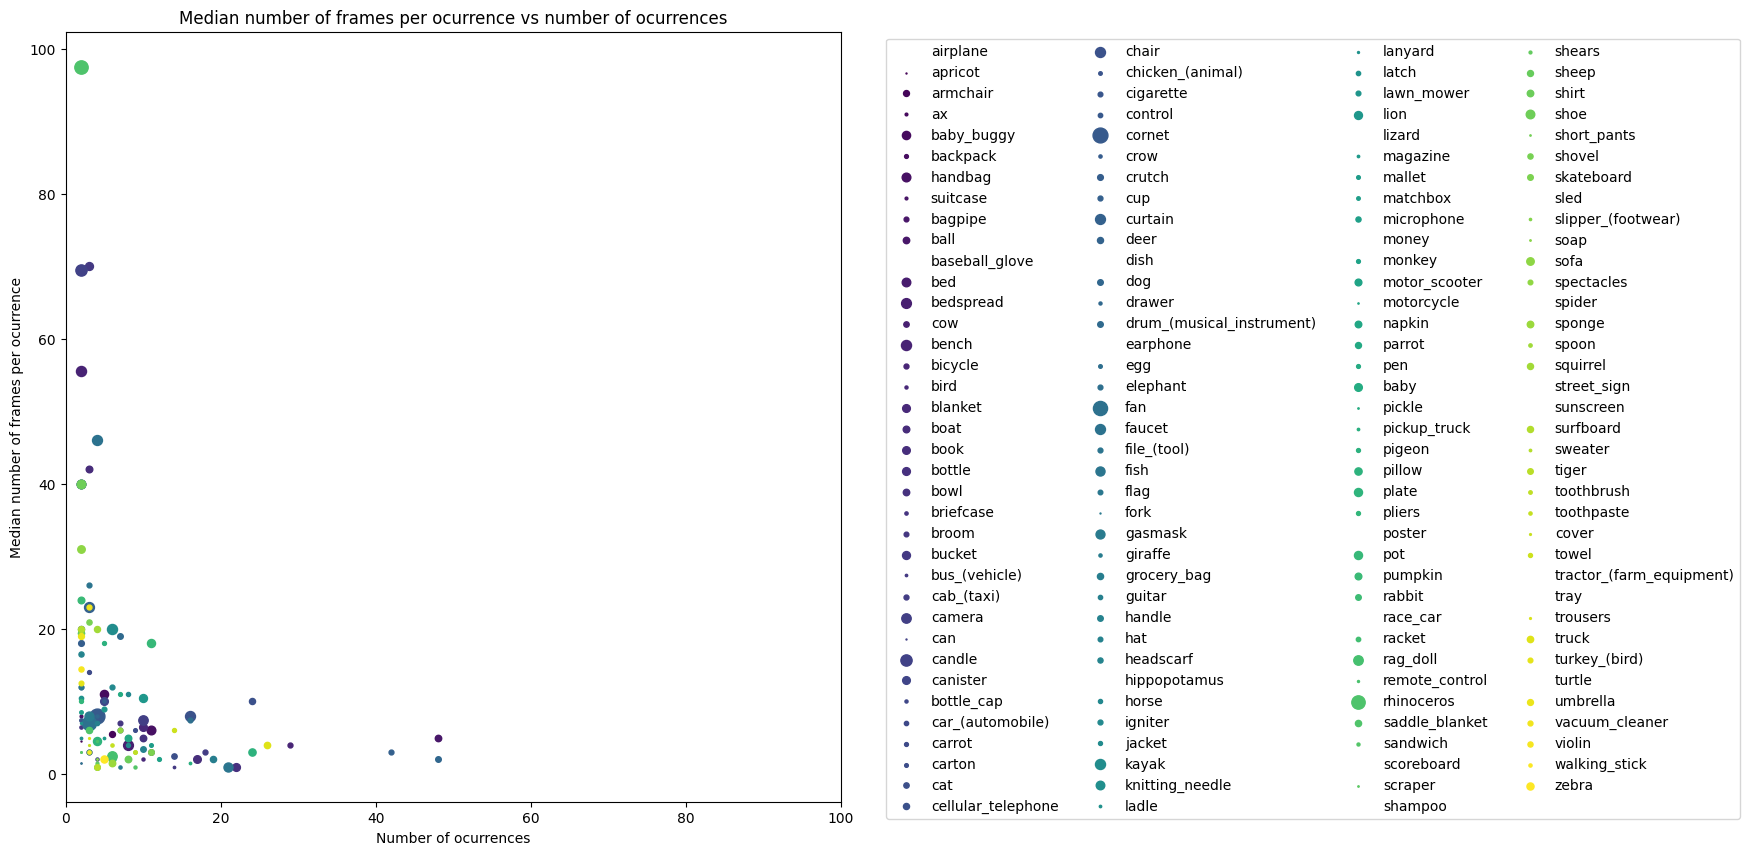

In [102]:
# Select only the categories that have more than 1 ocurrence
counts_dict_with_only_appeared_classes = {k: v for k, v in final_counts_dict.items() if len(v) > 1}

# Plot each category as a dot.
# The x axis is going to be the number of ocurrences and the y axis is going to be the median number of frames per ocurrence
counts_dict_with_only_appeared_classes = {k: (len(v), np.median(v), np.std(v)) for k, v in counts_dict_with_only_appeared_classes.items()}
x = [v[0] for v in counts_dict_with_only_appeared_classes.values()]
y = [v[1] for v in counts_dict_with_only_appeared_classes.values()]
yerr = [v[2] for v in counts_dict_with_only_appeared_classes.values()]
labels = [k[1] for k in counts_dict_with_only_appeared_classes.keys()]

# Generate a list of colors, assigning a different color to each category
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

plt.subplots(figsize=(10, 10))
#plt.scatter(x, y, s=yerr, c=colors, marker='o')
# For each category, plot a separate scatter plot so that it gets its own legend entry
for i in range(len(x)):
    plt.scatter(x[i], y[i], s=yerr[i], c=np.array([colors[i]]), label=labels[i], marker='o')

plt.xlabel('Number of ocurrences')
plt.ylabel('Median number of frames per ocurrence')
plt.title('Median number of frames per ocurrence vs number of ocurrences')

# Add the legend outside the plot, allowing for multiple columns
# Adjust the number of columns based on your preference
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=4)

# # Create a custom legend for the marker sizes
# sizes = [np.min(yerr), np.mean(yerr), np.max(yerr)]
# labels = [f'Low std ({np.min(yerr)})', f'Medium std ({np.mean(yerr)})', f'High std ({np.max(yerr)})']
# markers = [plt.Line2D([0,0],[0,0], color='none', marker='o', markerfacecolor='gray', markersize=np.sqrt(size)) for size in sizes]
# # Add the custom legend
# plt.legend(handles=markers, labels=labels, title='Standard deviation', bbox_to_anchor=(1.05, 0), loc='lower left')

plt.show()

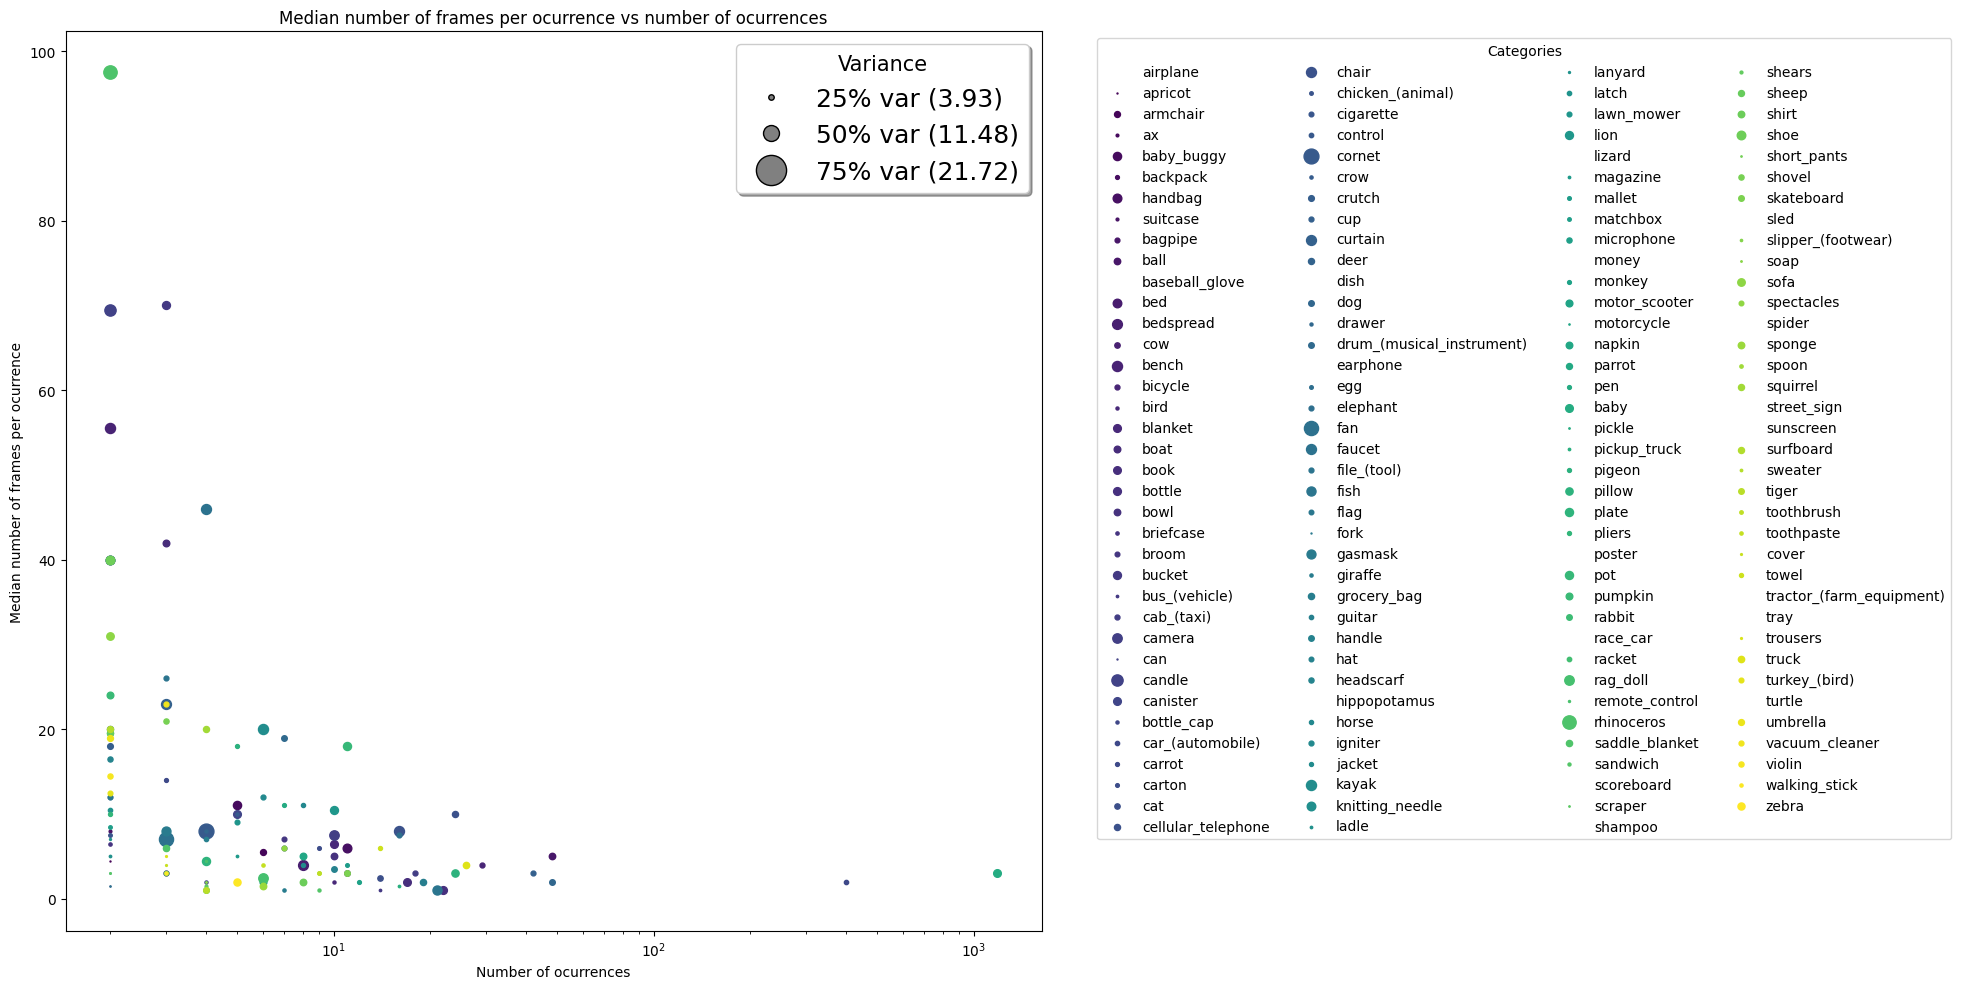

In [125]:
# Your existing code
counts_dict_with_only_appeared_classes = {k: v for k, v in final_counts_dict.items() if len(v) > 1}
counts_dict_with_only_appeared_classes = {k: (len(v), np.median(v), np.std(v)) for k, v in counts_dict_with_only_appeared_classes.items()}
x = [v[0] for v in counts_dict_with_only_appeared_classes.values()]
y = [v[1] for v in counts_dict_with_only_appeared_classes.values()]
yerr = [v[2] for v in counts_dict_with_only_appeared_classes.values()]
labels = [k[1] for k in counts_dict_with_only_appeared_classes.keys()]
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

fig, ax = plt.subplots(figsize=(10, 10))

# For each category, plot a separate scatter plot so that it gets its own legend entry
for i in range(len(x)):
    ax.scatter(x[i], y[i], s=yerr[i], c=np.array([colors[i]]), label=labels[i], marker='o')

ax.set_xlabel('Number of ocurrences')
ax.set_ylabel('Median number of frames per ocurrence')
ax.set_title('Median number of frames per ocurrence vs number of ocurrences')

# Create a custom legend for the marker sizes
#sizes = [np.quantile(yerr, 0.25), np.mean(yerr), np.max(yerr)]
sizes = [np.quantile(yerr, 0.25), np.quantile(yerr, 0.5), np.quantile(yerr, 0.75)]
labels = [f'25% var ({np.quantile(yerr, 0.25):0.2f})', f'50% var ({np.quantile(yerr, 0.5):0.2f})', f'75% var ({np.quantile(yerr, 0.75):0.2f})']
markers = [plt.Line2D([0,0],[0,0], color='none', marker='o', markerfacecolor='gray', markersize=size) for size in sizes]

# Add the custom legend
legend2 = ax.legend(handles=markers, labels=labels, title='Variance', loc='upper right', prop={'size': 18},
                    fancybox=True, shadow=True, title_fontsize='15')
ax.add_artist(legend2)

# Add the legend outside the plot, allowing for multiple columns
legend1 = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=4, title='Categories')

plt.xscale('log')
fig.tight_layout()
plt.savefig('median_number_of_frames_per_ocurrence_vs_number_of_ocurrences.pdf', bbox_inches='tight')
plt.show()


In [76]:
int(np.ceil(len(labels)/20))

8

In [49]:
data['annotations'][1]

{'segmentation': [[156, 97, 306, 97, 306, 398, 156, 398]],
 'bbox': [156, 97, 150, 301],
 'area': 45150,
 'iscrowd': 0,
 'id': 1,
 'image_id': 0,
 'category_id': 805,
 'track_id': 1,
 '_scale_uuid': '82addabd-8991-49f8-b63e-e0e767d4e695',
 'scale_category': 'moving object',
 'video_id': 0}

In [51]:
a = {'a': 1, 'b': 2}


In [126]:
data['categories'][0]

{'frequency': 'r',
 'id': 1,
 'synset': 'acorn.n.01',
 'image_count': 0,
 'instance_count': 0,
 'synonyms': ['acorn'],
 'def': 'nut from an oak tree',
 'name': 'acorn'}

In [52]:
a.pop('a')

1

# Old code

In [58]:
### VERTICAL BAR PLOT ###
# y_lim = 2000
# plt.subplots(figsize=(50, 10))
# plt.bar(total_frames_per_category.keys(), total_frames_per_category.values())
# # Plot values above the bars at 90 degrees
# for i, v in enumerate(total_frames_per_category.values()):
#     if v > y_lim:
#         plt.text(i, y_lim - 200, str(v), ha='center', va='bottom', rotation=90)
#     else:
#         plt.text(i, v + 25, str(v), ha='center', va='bottom', rotation=90)
# plt.ylim(0, y_lim)
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.savefig('number_of_frames_per_category.pdf')
# plt.show()

### HORIZONTAL BAR PLOT ###
x_lim = 2000
plt.subplots(figsize=(10, 40))
plt.barh(list(total_frames_per_category.keys()), total_frames_per_category.values(),
         color='skyblue', edgecolor='black', linewidth=1.2, alpha=0.7)
# Plot values above the bars at 90 degrees
for i, v in enumerate(total_frames_per_category.values()):
    ha = 'left'
    va = 'center'
    if v > x_lim:
        plt.text(x_lim - 200, i, str(v), ha=ha, va=va, rotation=0)
    else:
        plt.text(v + 25, i, str(v), ha=ha, va=va, rotation=0)
plt.xlim(0, x_lim)
#plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('number_of_frames_per_category.pdf')
plt.show()

Failed to initialize NVML: Driver/library version mismatch
NVML library version: 545.23
